# 使用python实现Excel中的练习题

* 数据来源
    * 课程《七周成为数据分析师》Excel讲解的练习数据
    
* 目标
    * 之前下面这些问题，秦璐老师用Excel完美解答，这里我用Python实现以下问题：
    

1. 全国点评数最高的饭店是哪家？
2. 哪个城市的饭店人均口味最好？
3. 哪个类型的餐饮评价最好？
4. 类型为川菜的店中，有多少个带[辣]字，有多少个带[麻]字
5. 口味、环境、服务三个评价都在8.0以上的饭店有几家？他们在哪个城市的占比最高
6. 上海地区中，各个类型饭店服务前5名？
7. 没有评价的饭店有几家？
8. 将讲个划分成0~50，50~100,100~150,150~200,200+的档次，各个城市分别有几家，其占比如何？
9. 对上海地区日本料理，做一次描述性分析

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

* **数据清洗**

In [2]:
city = pd.read_csv('cook.csv',encoding='gbk')

In [3]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 14 columns):
城市             5863 non-null object
类型             5863 non-null object
店名             5863 non-null object
点评             4509 non-null float64
人均             3012 non-null float64
口味             4425 non-null float64
环境             4425 non-null float64
服务             4425 non-null float64
Unnamed: 8     0 non-null float64
Unnamed: 9     0 non-null float64
Unnamed: 10    0 non-null float64
Unnamed: 11    0 non-null float64
Unnamed: 12    0 non-null float64
Unnamed: 13    0 non-null float64
dtypes: float64(11), object(3)
memory usage: 572.6+ KB


In [4]:
city.isnull().sum()

城市                0
类型                0
店名                0
点评             1354
人均             2851
口味             1438
环境             1438
服务             1438
Unnamed: 8     5863
Unnamed: 9     5863
Unnamed: 10    5863
Unnamed: 11    5863
Unnamed: 12    5863
Unnamed: 13    5863
dtype: int64

In [5]:
city.dropna(axis=1,how='all',inplace=True)

In [6]:
city.head(3)

,城市,类型,店名,点评,人均,口味,环境,服务
0,上海,小吃快餐,三宝粥铺(南京东路店)分店,21180.0,45.0,7.8,7.2,7.4
1,上海,粤菜,龙记香港茶餐厅(久光百货店)分店,8837.0,74.0,7.3,6.5,6.4
2,上海,其他,耶里夏丽(百联真光路店)分店,8113.0,88.0,9.0,9.0,9.0


* **全国点评数最高的饭店是哪家？**

In [7]:
dp = city.sort_values('点评',ascending=False)
print("全国点评数最多的饭店是：\n%s,\n点评数：%d"%(dp.iloc[0,2],dp.iloc[0,3]))

全国点评数最多的饭店是：
三宝粥铺(南京东路店)分店,
点评数：21180


* **哪个城市的饭店人均口味最好？**

In [8]:
group_city_mean = city.groupby('城市').mean().sort_values('口味',ascending=False)
print("最好的城市是：%s"%group_city_mean.index[0])

最好的城市是：上海


* **哪个类型的餐饮评价最好？**
* 使用线性加权设定评价指标
    * 0~1标准化
    * 评价指标 = np.log2（点评数 + 人均 + 口味 + 环境 + 服务）

In [9]:
city['好评指数'] = np.log2(city[['点评','人均','口味','服务','环境']].sum(1))
city.sort_values('好评指数',ascending=False).head(5)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


,城市,类型,店名,点评,人均,口味,环境,服务,好评指数
467,大连,其他,星海湾壹号,346.0,40533.0,8.4,9.3,8.6,15.320000
0,上海,小吃快餐,三宝粥铺(南京东路店)分店,21180.0,45.0,7.8,7.2,7.4,14.374999
1,上海,粤菜,龙记香港茶餐厅(久光百货店)分店,8837.0,74.0,7.3,6.5,6.4,13.124638
2,上海,其他,耶里夏丽(百联真光路店)分店,8113.0,88.0,9.0,9.0,9.0,13.006326
3,天津,火锅,大吉利潮汕牛肉火锅(南开店)分店,7691.0,81.0,9.2,8.8,9.0,12.929073


* **类型为川菜的店中，有多少个带[辣]字，有多少个带[麻]字**

In [10]:
city_chuancai = city.groupby('类型').get_group('川菜')
city_chuancai['店名'].str.contains('麻').value_counts()
print("类型为川菜的店铺中：")
print("有%d个店名带【辣】字"%city_chuancai['店名'].str.contains('辣').sum())
print("有%d个店名带【麻】字"%city_chuancai['店名'].str.contains('麻').sum())
print("有%d个店名同时带有【麻辣】字"%city_chuancai[city_chuancai['店名'].str.contains('麻')&city_chuancai['店名'].str.contains('辣')]['店名'].count())

类型为川菜的店铺中：
有44个店名带【辣】字
有28个店名带【麻】字
有28个店名同时带有【麻辣】字


* **口味、环境、服务三个评价都在8.0以上的饭店有几家？他们在哪个城市的占比最高**

In [11]:
city['特定']=['平常']*len(city) # 新建一标签列

In [12]:
a = city.query("""口味>8 & 环境>8 & 服务>8""")['店名'].count()
print('口味、环境、服务三个评价都在8.0以上的饭店有%d家'%a)

口味、环境、服务三个评价都在8.0以上的饭店有383家


In [13]:
city.loc[(city["口味"]>8) &(city['服务']>8)& (city['环境']>8),['特定']]='特定' # 对选中的标签列赋值

In [14]:
# 整理如下表的形式，计算每个城市中评分在8.0以上店铺个数
b = city.groupby(['城市','特定'])[['店名']].count().unstack(1).stack(0).reset_index(1).drop('level_1',axis=1).sort_values('特定')
b.head(2)

特定,平常,特定
城市,,
太原,95.0,1.0
中山,88.0,1.0


In [15]:
# 计算每行百分比
c = b.div(b.sum(1).astype(float),axis=0).sort_values('特定',ascending=False)

In [16]:
print("其中[%s]占比最高,为%.2f%%"%(c.index[0],c['特定'].iloc[0]*100))

其中[上海]占比最高,为38.92%


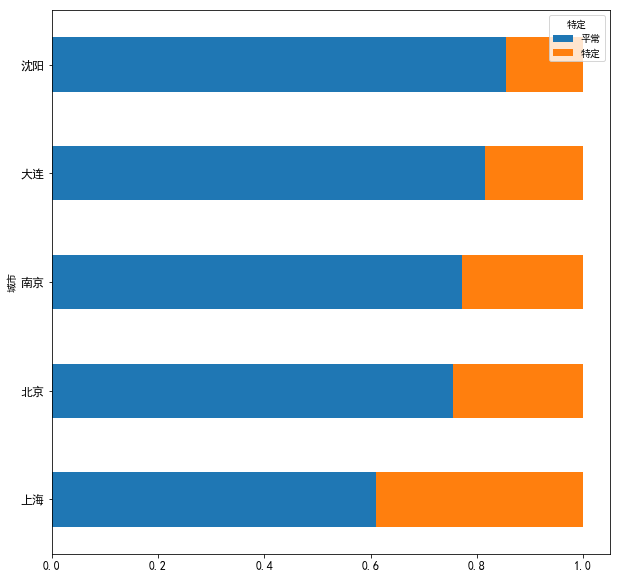

In [17]:
c.head(5).plot.barh(stacked=True,figsize=(10,10),fontsize=12)# 排名前5堆积柱形图

* **上海地区中，各个类型饭店服务前5名？**

In [18]:
d = city.groupby('城市').get_group('上海').groupby('类型')
d.groups

{'东北菜': Int64Index([53, 567, 1938, 1939, 2536, 2649, 2943, 5124], dtype='int64'),
 '东南亚菜': Int64Index([68, 108, 196, 861, 4063], dtype='int64'),
 '云南菜': Int64Index([93, 481, 4062], dtype='int64'),
 '其他': Int64Index([2, 126, 328, 407, 832, 853], dtype='int64'),
 '台湾菜': Int64Index([7, 50, 260, 292, 1488, 4061], dtype='int64'),
 '咖啡厅': Int64Index([6, 173, 340, 525, 589, 676, 836, 1088], dtype='int64'),
 '家常菜': Int64Index([1049, 1428, 1976, 2379, 3175, 3493, 4055, 4056, 4057, 4058, 5120,
             5121, 5122],
            dtype='int64'),
 '小吃快餐': Int64Index([0, 147, 199, 472, 621, 827, 852, 856, 1360, 1767], dtype='int64'),
 '小龙虾': Int64Index([9, 233, 423, 809, 953, 1747], dtype='int64'),
 '川菜': Int64Index([38, 554, 596, 675, 744, 1082], dtype='int64'),
 '新疆菜': Int64Index([501, 532, 802, 880], dtype='int64'),
 '日本菜': Int64Index([114, 116, 299, 582, 742, 940], dtype='int64'),
 '本帮江浙菜': Int64Index([130, 257, 395, 425, 469, 540, 1029, 1178], dtype='int64'),
 '江西菜': Int64Index([5125], dtype

In [19]:
df = pd.DataFrame()
for j,k in d:
    k_limit = k.sort_values('服务',ascending=False).head(5)[['店名','服务']]
    k_limit['种类']=j
    df = df.append(k_limit)

In [20]:
df[['种类','店名','服务']].to_csv('上海各个类型饭店服务前5名.csv',encoding='gbk')

* **没有评价的饭店有几家？**

In [21]:
city['点评'].isnull().value_counts()

False    4509
True     1354
Name: 点评, dtype: int64

In [22]:
print("没有点评的饭店有%d家"%city['点评'].isnull().value_counts()[1])

没有点评的饭店有1354家


* **将讲个划分成0~50，50~100,100~150,150~200,200+的档次**
* **各个城市分别有几家**
* **其占比如何？**

In [23]:
city['档次'] = pd.cut(city['人均'],
       bins=[0,50,100,150,200,100000],
       labels=['0~50','50~100','100~150','150~200','200+'])

In [24]:
city.head(3)

,城市,类型,店名,点评,人均,口味,环境,服务,好评指数,特定,档次
0,上海,小吃快餐,三宝粥铺(南京东路店)分店,21180.0,45.0,7.8,7.2,7.4,14.374999,平常,0~50
1,上海,粤菜,龙记香港茶餐厅(久光百货店)分店,8837.0,74.0,7.3,6.5,6.4,13.124638,平常,50~100
2,上海,其他,耶里夏丽(百联真光路店)分店,8113.0,88.0,9.0,9.0,9.0,13.006326,特定,50~100


In [25]:
e = city.groupby(['城市','档次'])[['店名']].count()
e.rename(columns={'店名':'店-占比'},inplace=True)
e = e.unstack(1)
e.tail() # 各个城市分别有几家

店-占比                            
档次  0~50 50~100 100~150 150~200 200+
城市                                  
重庆  43.0   24.0     6.0     1.0  2.0
金华  35.0    7.0     NaN     NaN  NaN
长春  42.0   13.0     NaN     NaN  1.0
长沙  39.0   13.0     NaN     1.0  NaN
青岛  57.0   17.0     5.0     2.0  NaN

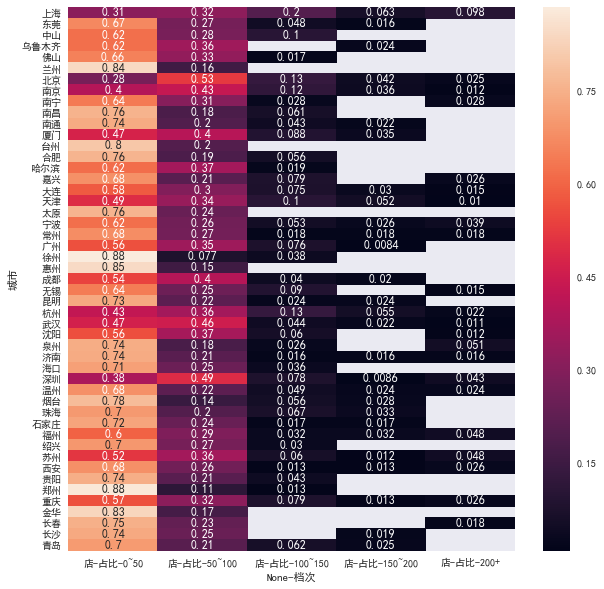

In [26]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1,font='SimHei') # 设置绘图文字大小，和所用字体（这里为黑体）
sns.heatmap(e.div(e.sum(1),axis=0),annot=True)

* 由热力图可知，大部分城市的饭店人均消费在50元以下
* 有不少城市，没有人均高于100元的饭店

* **对上海地区日本料理，做一次描述性分析**

In [40]:
city_sh = city.groupby('城市').get_group('上海')
city_sh['类型'].value_counts() # 只有日本菜，没有日本料理

家常菜      13
面包甜点     12
小吃快餐     10
西餐        9
粤菜        9
东北菜       8
湘菜        8
本帮江浙菜     8
咖啡厅       8
海鲜        7
韩国料理      7
日本菜       6
台湾菜       6
小龙虾       6
其他        6
烧烤        6
川菜        6
东南亚菜      5
西北菜       4
火锅        4
新疆菜       4
面馆        4
蟹宴        3
云南菜       3
自助餐       2
贵州菜       1
江西菜       1
素菜        1
Name: 类型, dtype: int64

In [50]:
city_sh.query(" 类型 == '日本菜'")

,城市,类型,店名,点评,人均,口味,环境,服务,好评指数,特定,档次
114,上海,日本菜,大馥 · 炭火烧肉屋(梅川路店)分店,1429.0,150.0,8.9,8.5,8.7,10.648447,特定,100~150
116,上海,日本菜,日葵 大阪烧(仙霞路店)分店,1416.0,106.0,8.8,8.3,8.1,10.595444,特定,100~150
299,上海,日本菜,池户寿司,574.0,61.0,8.6,8.4,8.5,9.367415,特定,50~100
582,上海,日本菜,一竹烧肉酒场,263.0,211.0,8.9,8.7,9.1,8.967803,特定,200+
742,上海,日本菜,牛吞炭火烧肉,168.0,137.0,8.8,8.8,9.0,8.373300,特定,100~150
940,上海,日本菜,柒味怀石料理,108.0,478.0,8.8,7.9,8.8,9.256209,平常,200+


In [53]:
city_sh.query(" 类型 == '日本菜'").describe()

,点评,人均,口味,环境,服务,好评指数
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,659.666667,190.500000,8.800000,8.433333,8.700000,9.534770
std,612.318436,149.324814,0.109545,0.320416,0.363318,0.910096
min,108.000000,61.000000,8.600000,7.900000,8.100000,8.373300
25%,191.750000,113.750000,8.800000,8.325000,8.550000,9.039904
50%,418.500000,143.500000,8.800000,8.450000,8.750000,9.311812
75%,1205.500000,195.750000,8.875000,8.650000,8.950000,10.288437
max,1429.000000,478.000000,8.900000,8.800000,9.100000,10.648447


* 90%以上日本菜，口味、环境、服务都在8.0分以上
* 这里需要另一个菜系，进行比较
* 上海地区日本菜，人均消费为190.5元，中位数为143.5元，而从之前的热力图中得知：63%的饭店人均消费在100元以下

> By 杨腾飞 2019/04/08 14.09